## Final Project Submission

* Student name: Emily Marsh
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux

## Introduction

Henbart LLC, a real estate developer in the Seattle area, is interested in developing more properties outside of the Seattle metropolitan area. They are responding to the pandemic-era trend where there has been more demand for single-family homes, however with inflation they want to make sure to build houses that will maximize their ROI. The statistical analysis of the Kings County Dataset will show which features maximize profit and will inform the type of homes and properties Henbart LLC will invest in. 

Content Exploration

Re-sell value of the house will be determined by price and statistical analysis will focus on property features that maximize this price. Analysis will focus on the features provided in the King County House Sales dataset.

In [1]:
#importing cleaning, statistical analysis, and data visualization programs

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from sklearn import preprocessing
from statsmodels.stats.stattools import durbin_watson
import pylab

import seaborn as sns
import numpy as np
%matplotlib inline

## Dataset Exploration and Preparation

Importing the King County House Sales dataset and preparing the dataset for statistical analysis and modeling

In [2]:
#using CSV reader to read dataframe into pandas
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
#overview of features available in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Summary of mean, quartiles, and std in the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the summary of the data set there are some details of interest given about the features. There are fifteen features with 21597 entries. There is also some interesting information given about the quartiles and possible outliers. 

In [5]:
# Dropping columns that are irrelevant to analysis of the data

In [6]:
df = df.drop(['date','view', 'sqft_above', 'sqft_basement','yr_renovated','zipcode','lat','long', 'sqft_living15','sqft_lot15','id'], axis=1)

In order to focus in on features that are the most relevenat to the analysis, the following columns were dropped. The locations where single family homes are to be developed have already been purchseed, so the features pertaining to location are irrelevant. Identifying features are also irrelevant to the analysis and to avoid multicollinearity similar columns were dropped leaving only one to summarize the feature. 

In [7]:
#dataframe head after columns have been dropped
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


## Categorical Variables

In order to create a linear regression model, the categorical features in the dataset need to be prepared. 

In [8]:
#Checking dataset for column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


The three categorical features in this data set are waterfront, condition, and grade

In [9]:
#exploring value types for waterfront column
df['waterfront'].head()

0    NaN
1     NO
2     NO
3     NO
4     NO
Name: waterfront, dtype: object

In [10]:
#replace null values in waterfront with No value
df["waterfront"].fillna("NO", inplace = True)

In [11]:
#checking new waterfront values
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [12]:
# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable while dropping any duplicates
le.fit(df['waterfront'].drop_duplicates())

# create new waterfront variable with label encoded values
df['waterfront'] = le.transform(df['waterfront'])

In [13]:
#check new values in waterfront
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [14]:
#exploring value types for condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
#create changes the datatype of a variable to a niche categorical datatype
df['condition'] = pd.Categorical(df['condition'], ['Poor', 'Fair', 'Average', 'Good', 'Very Good'], ordered=True)

#assigning categorical datatype values to condition column
df['condition'] = df['condition'].cat.codes


In [16]:
#check new values for condition column
df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [17]:
#exploring value types for grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [18]:
#create changes the datatype of a variable to a niche categorical datatype
df['grade'] = pd.Categorical(df['grade'], ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good','11 Excellent','12 Luxury', '13 Mansion'], ordered=True)

#assigning categorical datatype values to condition column
df['grade'] = df['grade'].cat.codes

In [19]:
#check new values of grade column
df['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

## StatsModels Multiple Linear Regression

Now that the data has been adquately prepared, statistical analysis tools can now be implemented

In [20]:
# create predictors
predictors = df.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df['price'],predictors_int).fit()

# Coefficents

Using the coefficent values will help determine if there is a positive or negative relationship between the features and the dependent variable which in this case is price. 

In [21]:
#coefficents for model
model.params

const          7.104142e+06
bedrooms      -4.256815e+04
bathrooms      5.077791e+04
sqft_living    1.772180e+02
sqft_lot      -2.429757e-01
floors         2.099817e+04
waterfront     7.551064e+05
condition      1.896196e+04
grade          1.300535e+05
yr_built      -3.846091e+03
dtype: float64

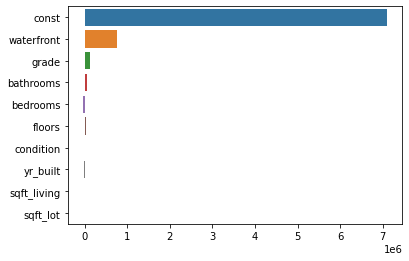

In [22]:
#creating tornadoe diagram of coefficent values
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

The coefficent values seem to show the possiblity of outliers affecting the model. That bedrooms and sqft_living would have a negative impact seems unlikely. 

## Model Summary

In [23]:
#view results of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4370.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:41:00   Log-Likelihood:            -2.9619e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.104e+06    1.3e+05     54.763      0.000    6.85e+06    7.36e+06
bedrooms    -4.257e+04   2050.780    -20.757      0.000   -4.66e+04   -3.85e+04
bathrooms    5.078e+04   3455.360     14.695      0.000     4.4e+04    5.76e+04
sqft_living   177.2180      3.303     53.646      0.000     170.743     183.693
sqft_lot       -0.2430      0.037     -6.605      0.000      -0.315      -0.171
floors         2.1e+04   3459.928      6.069      0.000    1.42e+04    2.78e+04
waterfront   7.551e+05   1.84e+04     41.124      0.000    7.19e+05    7.91e+05
condition    1.896e+04   2488.359      7.620      0.000    1.41e+04    2.38e+04
grade        1.301e+05   2156.111     60.319      0.000    1.26e+05    1.34e+05
yr_built    -3846.0915     66.732    -57.635      0.000   -3976.891   -3715.291
==============================================================================
Omnibus:                    15869.187   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1011405.789
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                      36.005   Cond. No.                     3.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary of the fit model gives some insight into the fit of the model. First is the R-squared value which shows us that 64.6% of the variation is explained by the model. The F statistic of the model is 4370 and the probability of the F statistic is zero which allows us to reject the null hypothesis that the interecept only model provides a better fit then the independent variables. The T values for the independent variables are all zeroe so therefore we can also use this to say with confidence that we can reject the null hypothesis as well. The last important peice of information by the summary is that the model has significant skew.  

## DF Model

How many independent variables we have in our model: 9

eval_env: 1


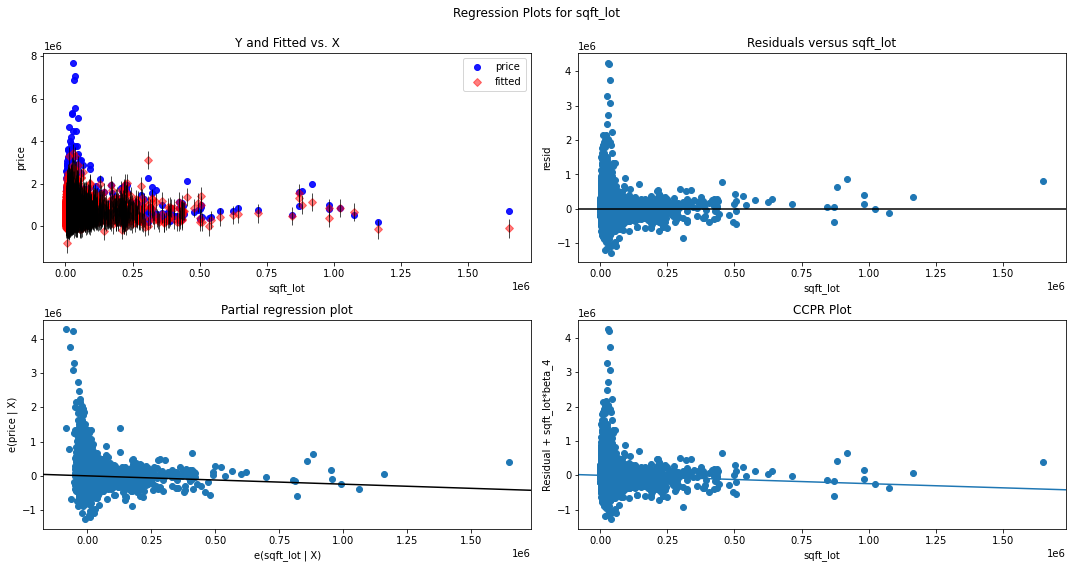

In [24]:
#plotting the degrees of freedom from the model
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show();

## Mean Absolute Error
Mean Absolute Error(MAE) represents the average error of the model. This will help with determining the accuracy of the models results.

In [25]:
# return residuals from model
residuals = model.resid
# view residuals
residuals

0        -73087.526036
1       -102788.652509
2        -38399.834273
3        112173.824050
4         69237.390657
             ...      
21592    -38639.627102
21593    -52935.278546
21594    291240.655386
21595     -8971.755402
21596    210226.988580
Length: 21597, dtype: float64

In [26]:
# return predicted values from model
y_pred = model.fittedvalues
# view predicted values
y_pred

0        294987.526036
1        640788.652509
2        218399.834273
3        491826.175950
4        440762.609343
             ...      
21592    398639.627102
21593    452935.278546
21594    110860.344614
21595    408971.755402
21596    114773.011420
Length: 21597, dtype: float64

In [27]:
# true y value
y = df["price"]

In [28]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))
# view residuals from model
mae_resid

141987.69260775685

The MAE informs us that on average, our model has an error of 141987.69 USD when predicting the price of a house.

## Mean Squared Error
The Mean Squared Error, or MSE tells us how close a regression line is to a set of true points. Used with the Root Mean Squared Error it will help determine if there are significant outliers in the dataset. 

In [29]:
# return Mean Squared Error of model
mse_resid = model.mse_resid
# view Mean Squared Error
mse_resid

47843496219.367134

## Root Mean Squared Error
Root Mean Square Error will help interpret the results of the MSE

In [30]:
# return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)
# view Root Mean Squared Error
rmse_residuals

218731.56201007465

Since MAE is less then RMSE it can be indicative that there are outliers present in the data

## Assumptions of Linear Regression
Making sure the model fufills the assumptions of linear regression will determine how trustworth the results are in our statistical analysis

# Linearity
Using pair plots will be helpful in determining if there is a linear relationship between the depedent and independent variables

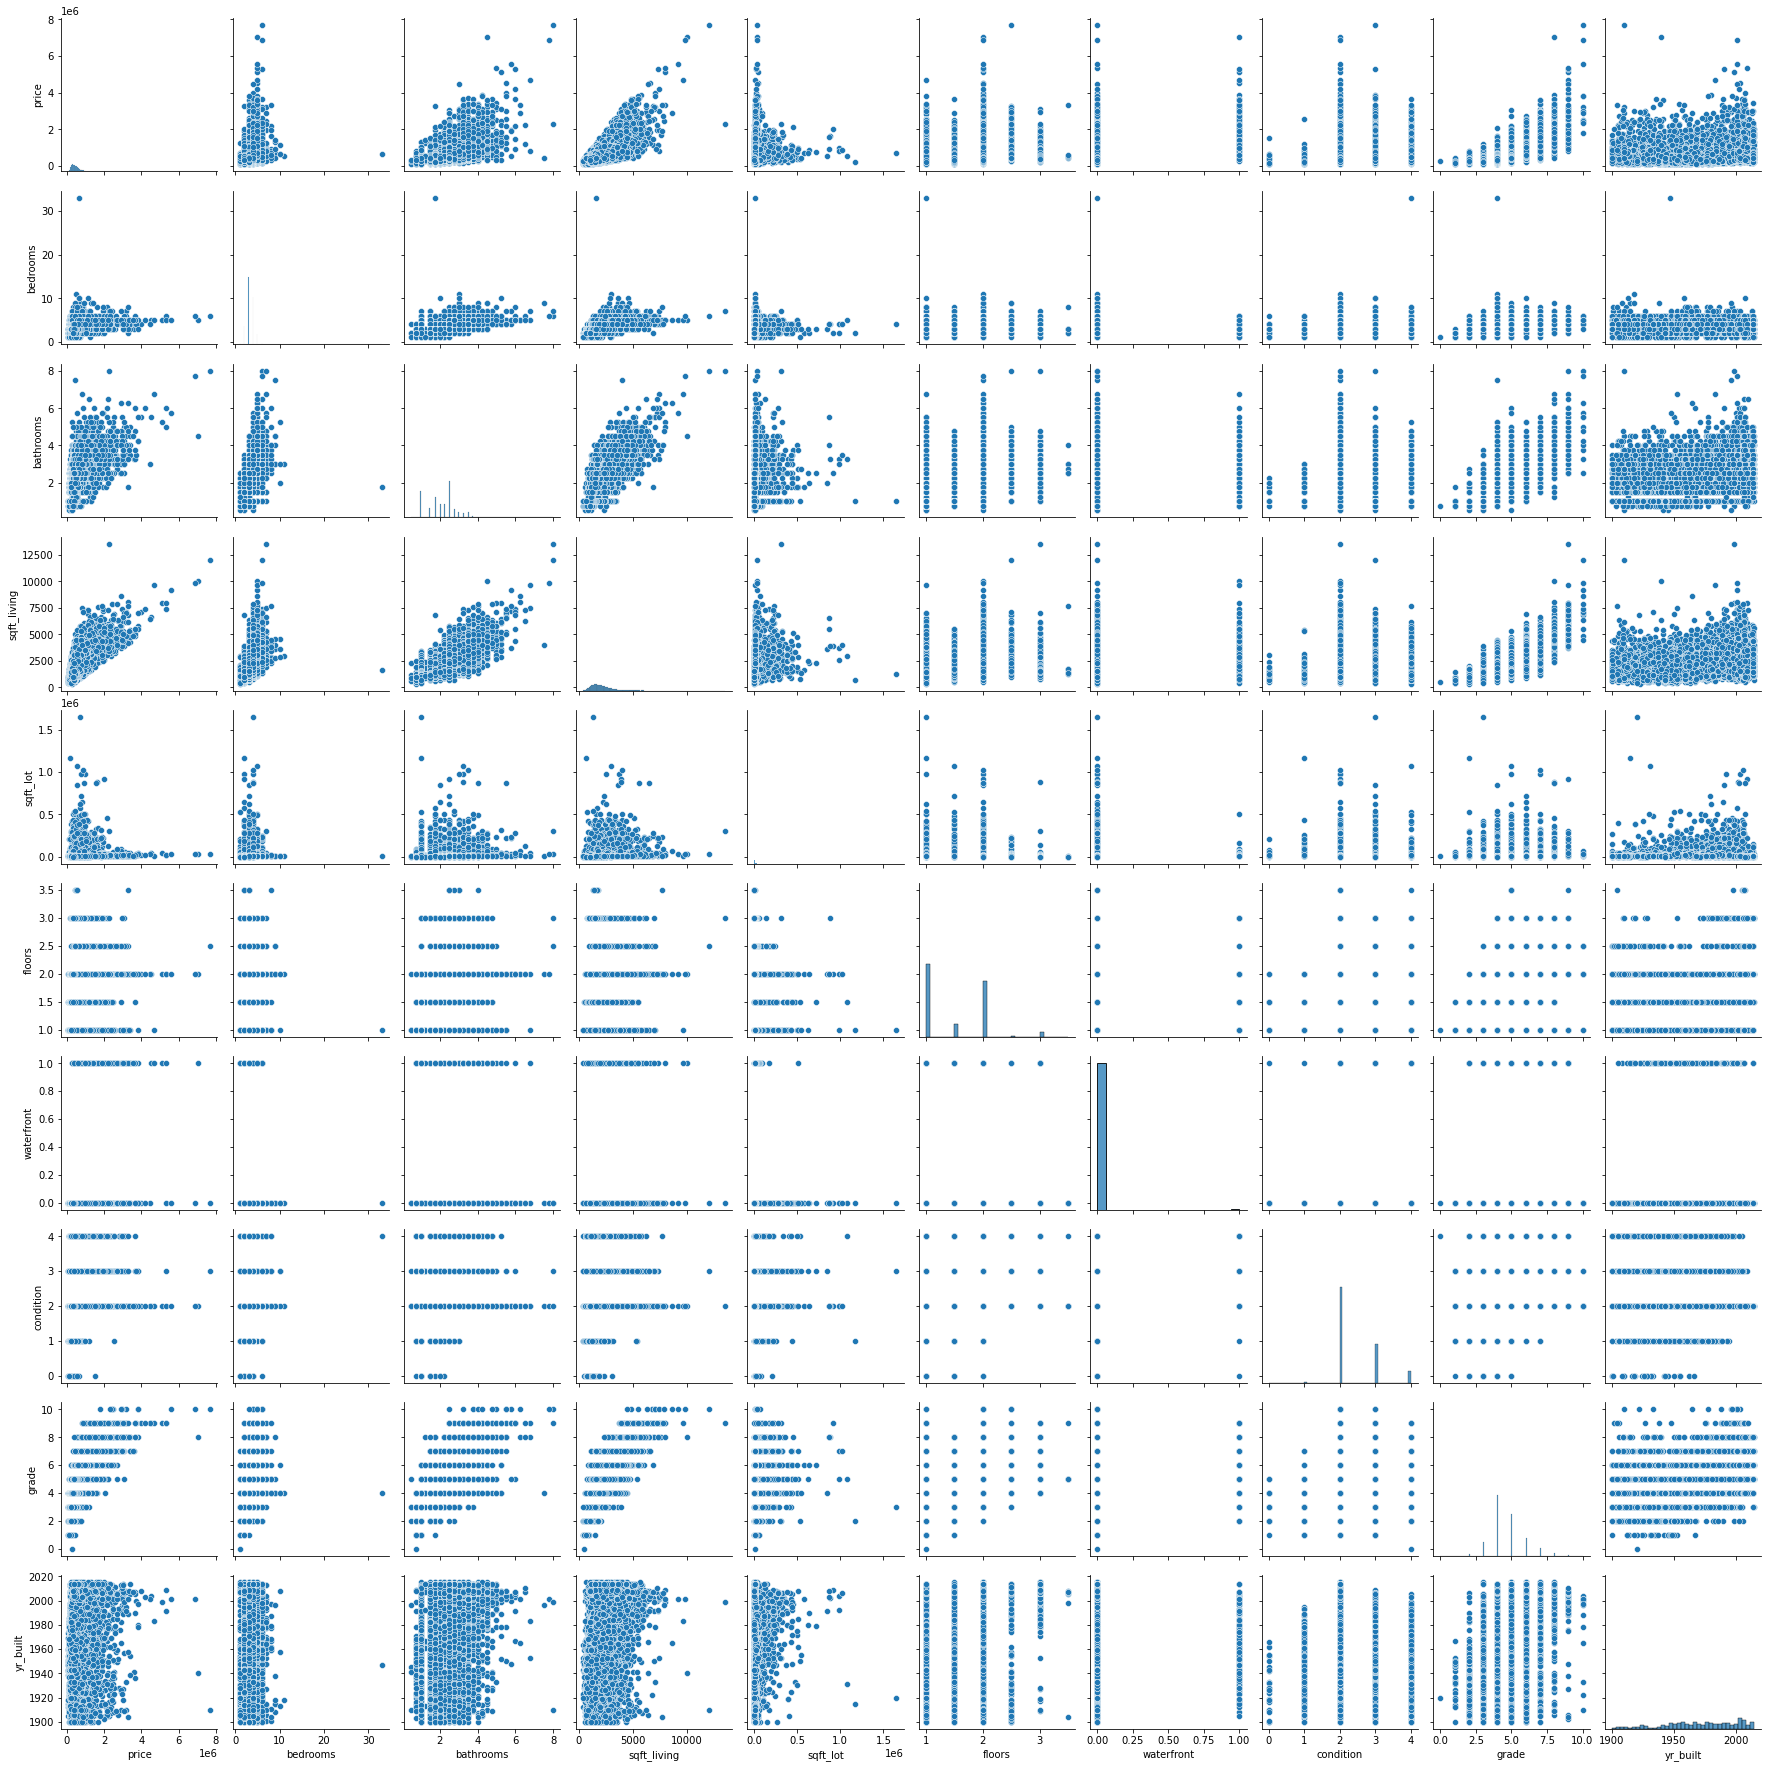

In [31]:
# Graph pairplots to determine linearity
sns.pairplot(df);

Looking at the pairplots the features with the strongest linear releationships with price seem to be bedrooms, bathrooms, sqft_living, and sqft_lot. However there seem to be extreme outliers for all four charts.

## Homoscedasticity
Homoscedasticity is the third assumption necessary when creating a linear regression model. By plotting the residuals versus the predicted y value it can be determined whether the null hypothesis can be rejeceted.

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


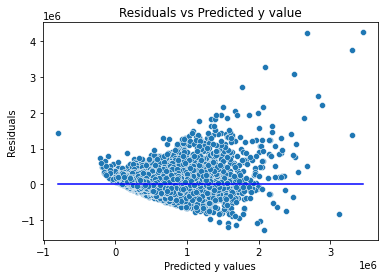

In [32]:
# Homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

In [33]:
#Goldfeld Quandt Test
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, predictors_int)
lzip(name, test)

[('F statistic', 0.9522825494595296), ('p-value', 0.9944421582314019)]

Here our p-value is 0.994 much greater than 0.05. This means we are not able to reject the null hypothesis which states our error terms are homoscedastic.

This further validates the assumption of homoscedasticity of our residuals.

## Normality

An assumption for linear regression is that residuals are normally distributed. This normality can be seen in a histogram as well as the skew of the data. 

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


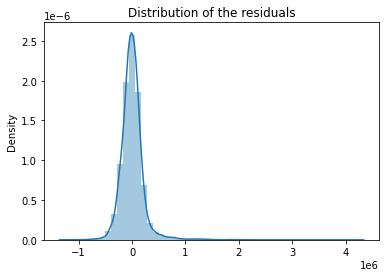

In [34]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [35]:
# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
mu, std

(1.3524544218621244e-07, 218680.91680760597)

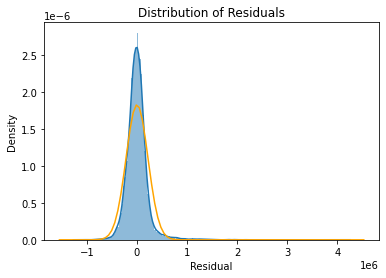

In [36]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

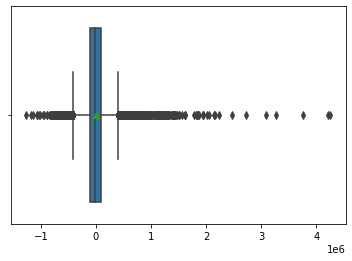

In [37]:
# view boxplot of residuals
sns.boxplot(residuals, showmeans=True)

## QQ Plot

The QQ plot is another way to visually confirm if the a given distribution belongs to a normal distribution.

/var/folders/n7/k7pk0gjj0rz19t5ylpv09t2w0000gn/T/ipykernel_7980/71005739.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


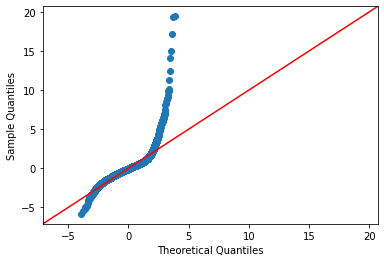

In [38]:
# create a Q-Q plot of the residuals
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

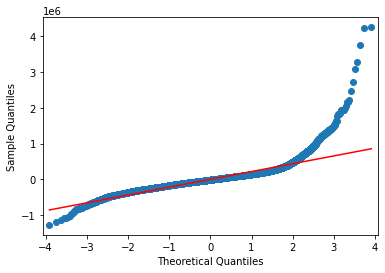

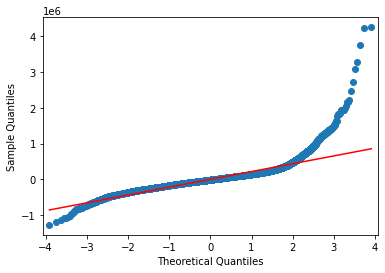

In [39]:
sm.qqplot(residuals, line ='s')

((array([-3.99686021, -3.78162805, -3.66389368, ...,  3.66389368,
          3.78162805,  3.99686021]),
  array([-1273315.25883092, -1184816.40062671, -1139541.53079603, ...,
          3755960.8189288 ,  4218248.40579244,  4252390.68634305])),
 (199429.20482181132, 1.353306871046359e-07, 0.9118019289711423))

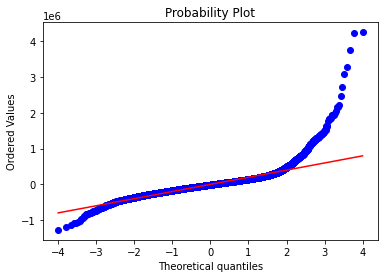

In [40]:
stats.probplot(residuals, dist="norm", plot=pylab)

## Remove Outliers

In [41]:
#Remove outliers
# IQR
Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['price'] >= (Q3+1*IQR))
# Lower bound
lower = np.where(df['price'] <= (Q1-1*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (21597, 10)
New Shape:  (19940, 10)


/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

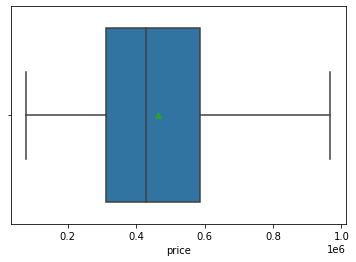

In [42]:
sns.boxplot(df["price"], showmeans=True)

In [43]:
predictors = df.drop(['price'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int).fit()

In [44]:
residuals = model.resid

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


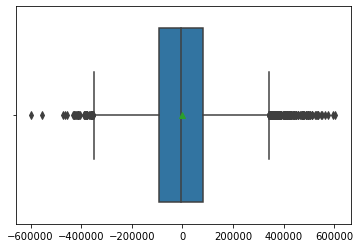

In [45]:
sns.boxplot(residuals, showmeans=True);

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2517.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:41:14   Log-Likelihood:            -2.6314e+05
No. Observations:               19940   AIC:                         5.263e+05
Df Residuals:                   19930   BIC:                         5.264e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.773e+06   8.39e+04     56.882      0.000    4.61e+06    4.94e+06
bedrooms    -1.393e+04   1304.206    -10.679      0.000   -1.65e+04   -1.14e+04
bathrooms    2.794e+04   2218.845     12.591      0.000    2.36e+04    3.23e+04
sqft_living    83.1491      2.253     36.903      0.000      78.733      87.565
sqft_lot        0.0483      0.024      2.015      0.044       0.001       0.095
floors       3.663e+04   2178.467     16.814      0.000    3.24e+04    4.09e+04
waterfront    1.49e+05   1.97e+04      7.560      0.000     1.1e+05    1.88e+05
condition    1.543e+04   1551.948      9.945      0.000    1.24e+04    1.85e+04
grade        9.542e+04   1417.628     67.313      0.000    9.26e+04    9.82e+04
yr_built    -2538.5520     43.430    -58.452      0.000   -2623.678   -2453.426
==============================================================================
Omnibus:                      404.303   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.733
Skew:                           0.311   Prob(JB):                    1.48e-100
Kurtosis:                       3.408   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
model.params

const          4.773025e+06
bedrooms      -1.392749e+04
bathrooms      2.793732e+04
sqft_living    8.314910e+01
sqft_lot       4.833632e-02
floors         3.662922e+04
waterfront     1.489532e+05
condition      1.543372e+04
grade          9.542420e+04
yr_built      -2.538552e+03
dtype: float64

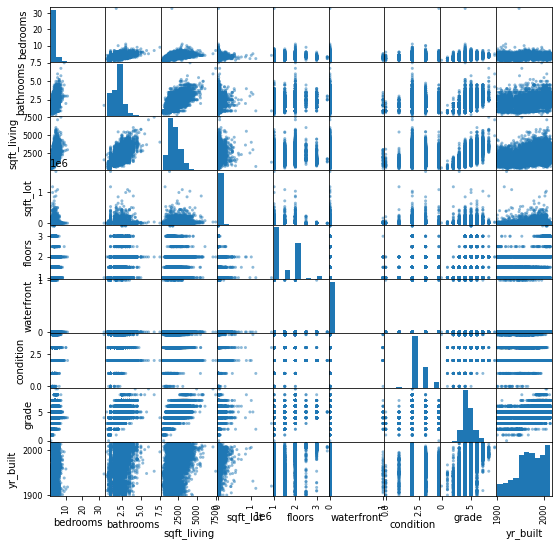

In [48]:
pd.plotting.scatter_matrix(predictors,figsize  = [9, 9]);
plt.show()

In [49]:
abs(predictors.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,False,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


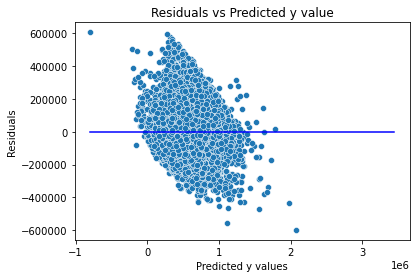

In [50]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

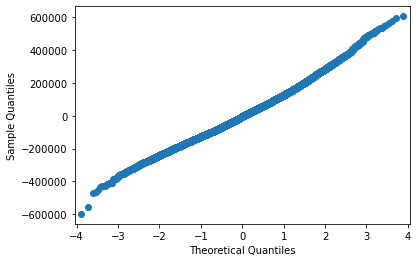

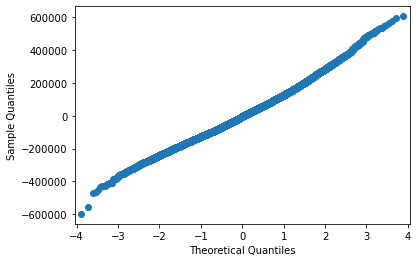

In [51]:
sm.qqplot(residuals)

## Log Transform

In [52]:
non_normal = ['price']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))

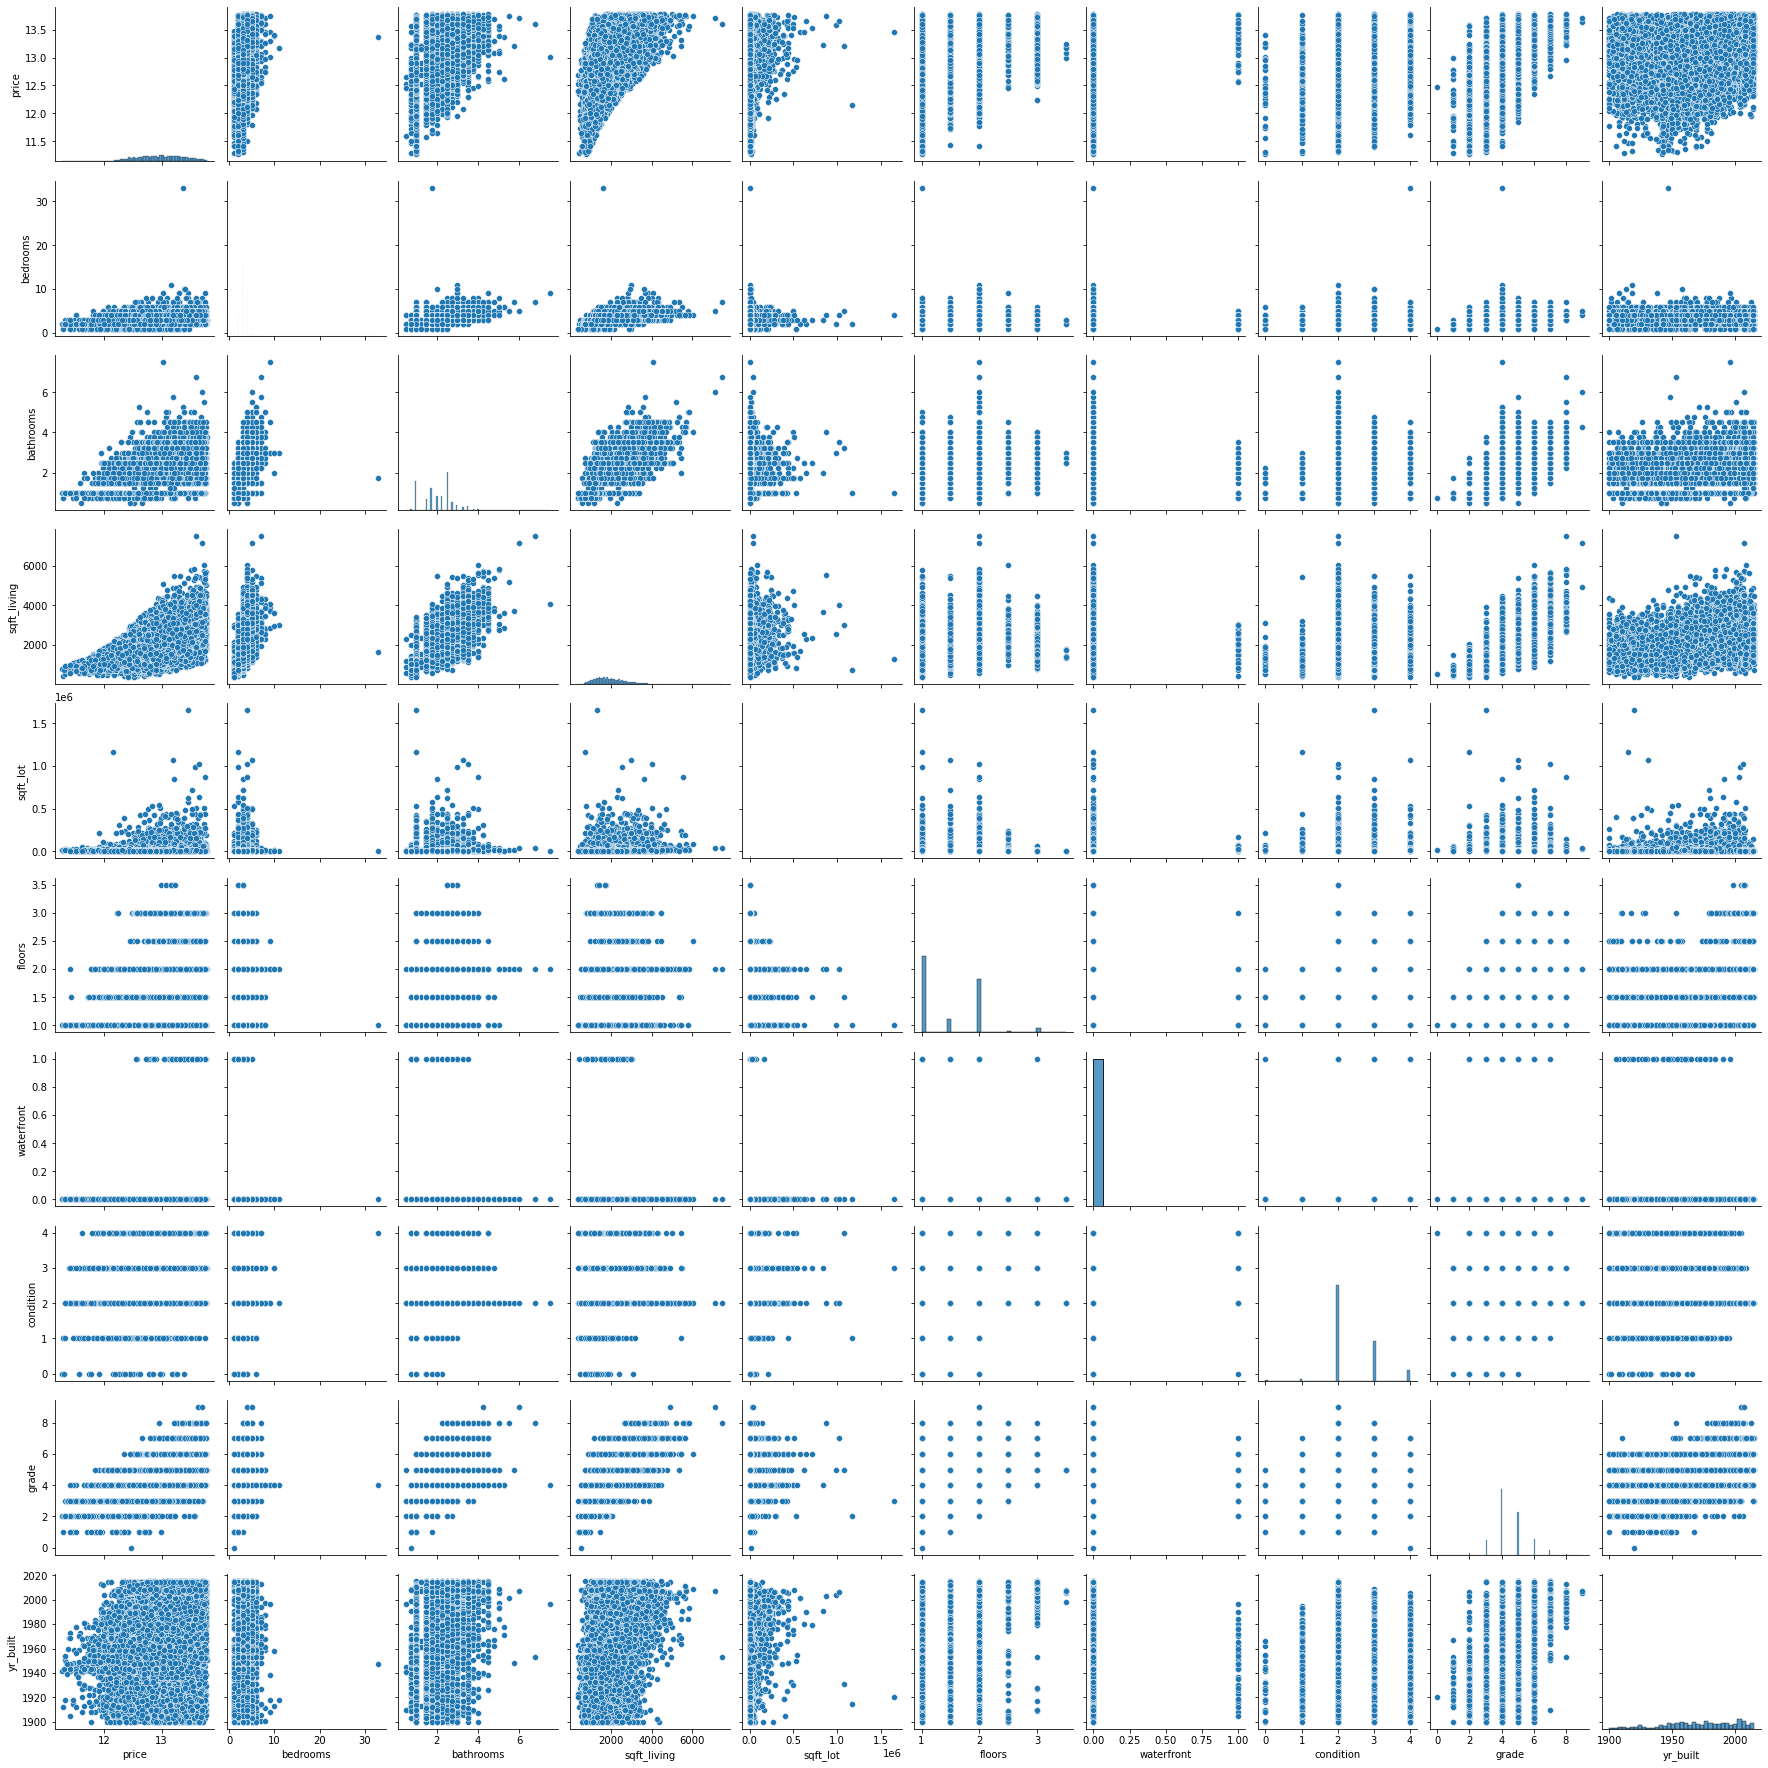

In [53]:
sns.pairplot(df)

In [54]:
# create predictors
predictors = df.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df['price'],predictors_int).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2248.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:                -4421.7
No. Observations:               19940   AIC:                             8863.
Df Residuals:                   19930   BIC:                             8942.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.0020      0.194    113.127      0.000      21.621      22.383
bedrooms       -0.0254      0.003     -8.404      0.000      -0.031      -0.019
bathrooms       0.0828      0.005     16.096      0.000       0.073       0.093
sqft_living     0.0002   5.22e-06     30.622      0.000       0.000       0.000
sqft_lot     1.167e-07   5.56e-08      2.099      0.036    7.75e-09    2.26e-07
floors          0.0869      0.005     17.218      0.000       0.077       0.097
waterfront      0.3161      0.046      6.923      0.000       0.227       0.406
condition       0.0386      0.004     10.736      0.000       0.032       0.046
grade           0.2097      0.003     63.809      0.000       0.203       0.216
yr_built       -0.0054      0.000    -53.453      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      205.799   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.326
Skew:                          -0.247   Prob(JB):                     7.84e-47
Kurtosis:                       3.108   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Normalization

In [56]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [57]:
# Use min max scaling on dataset
minmax_scale = preprocessing.MinMaxScaler().fit(df[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built']])
#df_minmax = pd.DataFrame(minmax_scale.transform(insurance_df[['age', 'bmi', 'children']]))
df_minmax = minmax_scale.transform(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built']])

In [58]:
df_minmax

array([[0.0625    , 0.07142857, 0.11392405, ..., 0.5       , 0.44444444,
        0.47826087],
       [0.0625    , 0.25      , 0.30942335, ..., 0.5       , 0.44444444,
        0.44347826],
       [0.03125   , 0.07142857, 0.05625879, ..., 0.5       , 0.33333333,
        0.28695652],
       ...,
       [0.03125   , 0.03571429, 0.09142053, ..., 0.5       , 0.44444444,
        0.94782609],
       [0.0625    , 0.28571429, 0.17299578, ..., 0.5       , 0.55555556,
        0.90434783],
       [0.03125   , 0.03571429, 0.09142053, ..., 0.5       , 0.44444444,
        0.93913043]])

In [59]:
df_minmax.shape

(19940, 9)

In [60]:
# creating a copy of the dataframe
df2 = df.copy()


In [61]:
df2 = pd.concat([df2, pd.DataFrame(df_minmax)], axis=1)

In [62]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,0,1,2,3,4,5,6,7,8
0,12.309982,3.0,1.00,1180.0,5650.0,1.0,0.0,2.0,4.0,1955.0,0.06250,0.071429,0.113924,0.003108,0.0,0.0,0.5,0.444444,0.478261
1,13.195614,3.0,2.25,2570.0,7242.0,2.0,0.0,2.0,4.0,1951.0,0.06250,0.250000,0.309423,0.004072,0.4,0.0,0.5,0.444444,0.443478
2,12.100712,2.0,1.00,770.0,10000.0,1.0,0.0,2.0,3.0,1933.0,0.03125,0.071429,0.056259,0.005743,0.0,0.0,0.5,0.333333,0.286957
3,13.311329,4.0,3.00,1960.0,5000.0,1.0,0.0,4.0,4.0,1965.0,0.09375,0.357143,0.223629,0.002714,0.0,0.0,1.0,0.444444,0.565217
4,13.142166,3.0,2.00,1680.0,8080.0,1.0,0.0,2.0,5.0,1987.0,0.06250,0.214286,0.184248,0.004579,0.0,0.0,0.5,0.555556,0.756522


In [63]:
df2 = df2.drop([ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'], axis= 1)

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21429 entries, 0 to 19912
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   19940 non-null  float64
 1   0       19940 non-null  float64
 2   1       19940 non-null  float64
 3   2       19940 non-null  float64
 4   3       19940 non-null  float64
 5   4       19940 non-null  float64
 6   5       19940 non-null  float64
 7   6       19940 non-null  float64
 8   7       19940 non-null  float64
 9   8       19940 non-null  float64
dtypes: float64(10)
memory usage: 1.8 MB


In [65]:
df2.isna().any()

price    True
0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
dtype: bool

In [66]:
df2.isnull().sum()

price    1489
0        1489
1        1489
2        1489
3        1489
4        1489
5        1489
6        1489
7        1489
8        1489
dtype: int64

In [67]:
df2 = df2.dropna()

In [68]:
#create predictors
predictors2 = df2.drop(['price'], axis=1)

# create model intercept
predictors_int2 = sm.add_constant(predictors2)

# fit model to data
model2 = sm.OLS(df2['price'], predictors_int2).fit()

In [69]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7911
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.625
Time:                        21:41:32   Log-Likelihood:                -10727.
No. Observations:               18451   AIC:                         2.147e+04
Df Residuals:                   18441   BIC:                         2.155e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9202      0.023    556.799      0.000      12.875      12.966
0             -0.0540      0.144     -0.376      0.707      -0.335       0.227
1              0.0629      0.054      1.169      0.242      -0.043       0.168
2              0.0340      0.055      0.612      0.540      -0.075       0.143
3              0.0191      0.135      0.141      0.888      -0.246       0.284
4             -0.0013      0.019     -0.069      0.945      -0.038       0.035
5              0.0428      0.070      0.616      0.538      -0.093       0.179
6              0.0240      0.021      1.119      0.263      -0.018       0.066
7             -0.0074      0.044     -0.168      0.867      -0.094       0.079
8              0.0006      0.017      0.032      0.974      -0.033       0.034
==============================================================================
Omnibus:                      376.068   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.506
Skew:                          -0.266   Prob(JB):                     2.08e-71
Kurtosis:                       2.625   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Standard Scaling

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19940 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19940 non-null  float64
 1   bedrooms     19940 non-null  int64  
 2   bathrooms    19940 non-null  float64
 3   sqft_living  19940 non-null  int64  
 4   sqft_lot     19940 non-null  int64  
 5   floors       19940 non-null  float64
 6   waterfront   19940 non-null  int64  
 7   condition    19940 non-null  int8   
 8   grade        19940 non-null  int8   
 9   yr_built     19940 non-null  int64  
dtypes: float64(3), int64(5), int8(2)
memory usage: 1.9 MB


In [71]:
# Scale features in dataframe
std_scale = preprocessing.StandardScaler().fit(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']])
df_std = std_scale.transform(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']])

In [72]:
# create a copy of dataframe
df3 = df.copy()

# drop old columns
df3 = df3.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built'], axis=1)

In [73]:
df_std

array([[-0.34967875, -1.47879148, -1.0238488 , -0.22279814, -0.54155749],
       [-0.34967875,  0.31225678,  0.83727022, -0.18227392, -0.67911035],
       [-1.45363605, -1.47879148, -1.57281196, -0.11206925, -1.29809823],
       ...,
       [-1.45363605, -1.83700113, -1.23807832, -0.33225429,  1.31540616],
       [-0.34967875,  0.67046643, -0.46149629, -0.30583208,  1.14346508],
       [-1.45363605, -1.83700113, -1.23807832, -0.33922894,  1.28101794]])

In [74]:
df_std.shape

(19940, 5)

In [75]:
# create new DataFrame with minmax variables
#add NumPy matrix as new columns in DataFrame
df3 = pd.concat([df3, pd.DataFrame(df_std)], axis=1)

# view new DataFrame info
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21429 entries, 0 to 19912
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       19940 non-null  float64
 1   floors      19940 non-null  float64
 2   waterfront  19940 non-null  float64
 3   condition   19940 non-null  float64
 4   grade       19940 non-null  float64
 5   0           19940 non-null  float64
 6   1           19940 non-null  float64
 7   2           19940 non-null  float64
 8   3           19940 non-null  float64
 9   4           19940 non-null  float64
dtypes: float64(10)
memory usage: 1.8 MB


In [76]:
df3 = df3.dropna()

In [77]:
# create predictors
predictors3 = df3.drop(['price'], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(df3['price'], predictors_int3).fit()


In [78]:
# view model results
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     1238.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:                -6369.2
No. Observations:               18451   AIC:                         1.276e+04
Df Residuals:                   18441   BIC:                         1.284e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5044      0.017    691.125      0.000      11.472      11.537
floors         0.0432      0.006      7.614      0.000       0.032       0.054
waterfront     0.4203      0.052      8.143      0.000       0.319       0.521
condition      0.0958      0.004     24.304      0.000       0.088       0.104
grade          0.2587      0.003     91.182      0.000       0.253       0.264
0              0.0022      0.003      0.695      0.487      -0.004       0.008
1              0.0052      0.004      1.273      0.203      -0.003       0.013
2              0.0012      0.004      0.300      0.764      -0.007       0.009
3              0.0006      0.003      0.237      0.813      -0.004       0.006
4             -0.0061      0.003     -1.978      0.048      -0.012   -5.46e-05
==============================================================================
Omnibus:                       88.415   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.139
Skew:                          -0.135   Prob(JB):                     8.84e-19
Kurtosis:                       2.812   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mean of Residuals = 0

In [79]:
# calculate and print the mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 8.18919319446491e-09


## Independence of Residuals

## Autocorrelation

In [80]:
durbin_watson(residuals)

1.9631498011655975

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


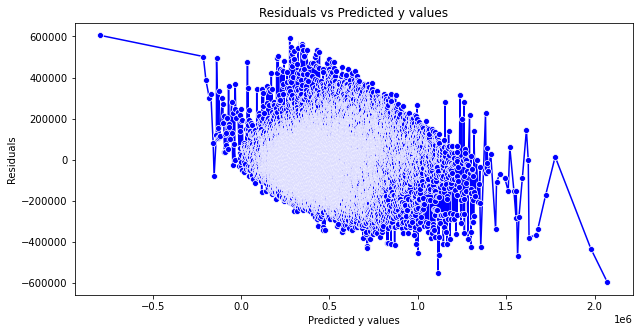

In [81]:
# check for autocorrelation using lineplot
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
#p = sns.lineplot([70,100],[0,0],color='red')
p = plt.title('Residuals vs Predicted y values');

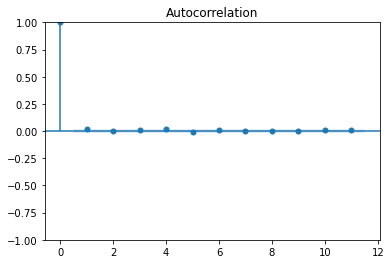

In [82]:
# check for autocorrelation with ACF
sm.graphics.tsa.plot_acf(residuals, lags=11)
plt.show()


## No Perfect Multicollinearity

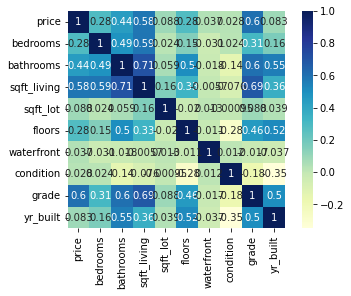

In [83]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu',square=True);